In [8]:
from latex2sympy2 import latex2sympy, latex2latex

OCR

In [30]:
! pip install texify -q

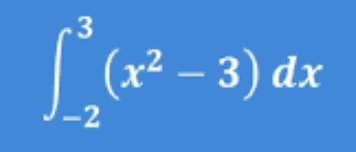

In [36]:
img = Image.open('../images/Screenshot 2024-03-18 at 13.37.54.png')
img

In [37]:
from texify.inference import batch_inference
from texify.model.model import load_model
from texify.model.processor import load_processor
from PIL import Image

model = load_model()
processor = load_processor()

Loaded texify model to mps with torch.float16 dtype


In [38]:
results = batch_inference([img], model, processor)
results[0]

'$$\\int_{-\\infty}^{\\infty}\\left(e^{-x^{2}}-e^{-x}\\right)\\,d x$$'

Text(0.4, 0.4, '$\\int_{-\\infty}^{\\infty}\\left(e^{-x^{2}}-e^{-x}\\right)\\,d x$')

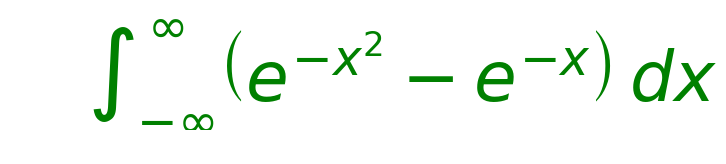

In [39]:
import matplotlib.pyplot as plt

a = rf'{results[0][2:-2]}'
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.4,0.4,'$%s$' %a,size=50,color="green")

In [40]:
from pix2tex import cli as pix2tex
from PIL import Image
model1 = pix2tex.LatexOCR()

ltx = model1(img=img)
print(ltx)

\int_{-2}^{3}(x^{2}-3)\,d x


Text(0.4, 0.4, '$\\int_{-2}^{3}(x^{2}-3)\\,d x$')

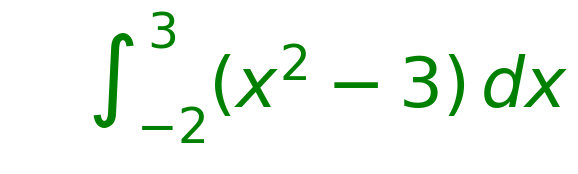

In [41]:

a = rf'{ltx}'
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.4,0.4,'$%s$' %a,size=50,color="green")

Integration

In [68]:
from latex2sympy2 import latex2sympy
import sympy as sp
import numpy as np

class IntegralCalculator:
    def __init__(self, integral_str):

        self.lower_limit, self.upper_limit, self.function = self._parse_integral_input(integral_str)
        x = sp.symbols('x')
        self.function_lambda = sp.lambdify(x, self.function, 'numpy')
        self.x = x  

    def _parse_integral_input(self, integral_str):
        # Convert LaTeX to sympy expression
        integral_expr = latex2sympy(integral_str, {"integrate": False})
        
        lower_limit = integral_expr.limits[0][1]
        upper_limit = integral_expr.limits[0][2]
        function = integral_expr.function
        
        return float(lower_limit), float(upper_limit), function

    def integrate_by_squares(self, n):
        h = (self.upper_limit - self.lower_limit) / n
        result = 0
        for i in range(n):
            midpoint = self.lower_limit + (i + 0.5) * h
            result += self.function_lambda(midpoint)
        return result * h

    def integrate_by_trapezoids(self, n):
        h = (self.upper_limit - self.lower_limit) / n
        result = (self.function_lambda(self.lower_limit) + self.function_lambda(self.upper_limit)) / 2
        for i in range(1, n):
            result += self.function_lambda(self.lower_limit + i * h)
        return result * h

    def integrate_by_parabolic(self, n):
        if n % 2 == 1:
            n += 1  
        h = (self.upper_limit - self.lower_limit) / n
        result = self.function_lambda(self.lower_limit) + self.function_lambda(self.upper_limit)
        for i in range(1, n):
            factor = 4 if i % 2 == 1 else 2
            result += factor * self.function_lambda(self.lower_limit + i * h)
        return result * h / 3


In [69]:
ltx

'\\int_{-2}^{3}(x^{2}-3)\\,d x'

In [70]:
integral_input = ltx
calculator = IntegralCalculator(integral_input)
n = 1000  
print("Integral using Midpoint (Squares) method:", calculator.integrate_by_squares(n))
print("Integral using Trapezoidal method:", calculator.integrate_by_trapezoids(n))
print("Integral using Simpson's (Parabolic) method:", calculator.integrate_by_parabolic(n))

Integral using Midpoint (Squares) method: -3.3333437500000014
Integral using Trapezoidal method: -3.333312499999998
Integral using Simpson's (Parabolic) method: -3.3333333333333326
